# Preparing datasets

In [1]:
import pandas as pd 
data1 = pd.read_csv('spam_ham_dataset.csv')
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [2]:
# delete unneeded columns
data1.drop("Unnamed: 0",inplace=True,axis=1)

In [3]:
# Remove rows where the text in 'text_column' is longer than max_length
def filter_by_body_length(df):
    max_length = 100000
    return df[df['text'].apply(lambda x: len(str(x)) <= max_length)]

data1 = filter_by_body_length(data1)

In [4]:
# concatenate data and take a small fraction
# data = pd.concat([data1,data2,data3],axis=0).sample(frac=0.05)
data = data1.sample(frac=0.3)
# remove missing values (NaN)
data.dropna(inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1551 entries, 3027 to 1867
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1551 non-null   object
 1   text       1551 non-null   object
 2   label_num  1551 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 48.5+ KB


,label,text,label_num
3027,ham,Subject: tenaska iv 10 / 00\r\na revised amoun...,0
3966,ham,Subject: neon discussion february 14\r\nhey gu...,0
629,ham,Subject: gas day 2 / 08 / 01\r\nwe agree :\r\n...,0
4112,spam,Subject: security warning\r\n,1
1012,spam,Subject: innovative big sized seencs\r\ni know...,1


C:\Users\ela\AppData\Local\Temp\ipykernel_20360\1446035735.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="label", data=data, palette="Pastel2")
C:\Users\ela\AppData\Local\Temp\ipykernel_20360\1446035735.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['ham', 'spam'])


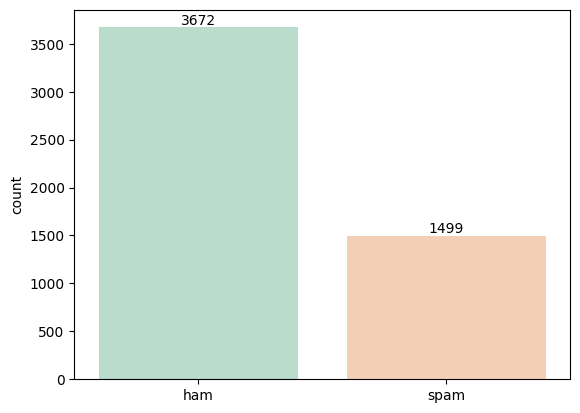

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('spam_ham_dataset.csv')  # Replace 'your_file_path.csv' with the actual file path

ax = sns.countplot(x="label", data=data, palette="Pastel2")

for i, value in enumerate(data["label"].value_counts(ascending=False).values):
    ax.annotate(value, (i, value), ha='center', va='bottom')

ax.set_xticklabels(['ham', 'spam'])
plt.xlabel(None)
plt.show()


In [11]:
emails = data["text"]

# Text preprocessing
Here I'm removing unneeded characters, like HTML tags, emails etc.

In [12]:
import re

# remove emails
emails = [re.sub('\S*@\S*\s?', '', text) for text in emails]
# remove url links
emails = [re.sub('\S*(http[s]?://|www\.)\S*', '', text) for text in emails]
# remove HTML tags
emails = [re.sub(r"'<.*?>'", "", text) for text in emails]
# remove special characters and numbers
emails = [re.sub("[^a-zA-Z]"," ",text) for text in emails]
# remove too short (2- characters) words
emails = [re.sub(r"\b\w{1,2}\b", "",text) for text in emails]
# and too long (17+ characters)
emails = [re.sub(r"\b\w{17,}\b", "",text) for text in emails]
# remove multiple spaces
emails = [re.sub(' +', ' ', text).strip() for text in emails]
# lower
emails = [text.lower() for text in emails]

emails[0]

'subject enron methanol meter this follow the note gave you monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity you can obtain from gas control this change needed asap for economics purposes'

## Tokenization and lemmatization

In [13]:
custom_stopwords = ['subject', 'empty', 'email', 'mail', 'enron', 'linux', 'list', 'get', 'http', 'vince', 'com', 'org', 'www', 'etc', 'ect', 'edu', 'hou', 'would', 'need']

# **Using Spacy**

In [15]:
pip install spacy


     ---------------------------------------- 0.0/45.9 kB ? eta -:--:--
     ---------------------------------------- 45.9/45.9 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.2 kB ? eta -:--:--
     ---------------------------------------- 65.2/65.2 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/181.6 kB ? eta -:--:--
     -------------------------------------- 181.6/181.6 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.2/12.1 MB 4.1 MB/s eta 0:00:03
   - -------------------------------------- 0.4/12.1 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.1 MB 4.4 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/12.1 MB 4.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/12.1 MB 4.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.7/12.1 MB 4.8 MB/s eta 0:00:03
   ------ 

In [18]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 2.2 MB/s eta 0:00:06
      --------------------------------------- 0.3/12.8 MB 3.2 MB/s eta 0:00:04
     - -------------------------------------- 0.5/12.8 MB 3.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/12.8 MB 3.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.8 MB 4.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.6/12.8 MB 4.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.1 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/12.8 MB 4.1 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/12.8 MB 4.1 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 4.0 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 3.9 MB/s eta 0:00:03
     ------- -------------------------------- 2.5/12.8 MB 3

In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")

# remove stop words
for word in custom_stopwords:
    nlp.vocab[word].is_stop = True

In [20]:
# lemmatization
emails = [[token.lemma_ for token in nlp(text) if not token.is_stop] for text in emails]
emails[0][:15]

['methanol',
 'meter',
 'follow',
 'note',
 'give',
 'monday',
 'preliminary',
 'flow',
 'datum',
 'provide',
 'daren',
 'override',
 'pop',
 'daily',
 'volume']

# Feature extraction


In [21]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(max_features=25000, ngram_range=(1,1), min_df=0.003, max_df=0.9)
tf_idf = tf_vectorizer.fit_transform([" ".join(text) for text in emails]).toarray()
print(tf_idf.shape)
tf_vectorizer.get_feature_names_out()[:10]

(5171, 2470)


array(['ability', 'able', 'absence', 'absolutely', 'accept', 'acceptance',
       'access', 'accomplish', 'accord', 'accordingly'], dtype=object)

# Split to train and test data


In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

# split to train and test data for TF-IDF
x2_train,x2_test,y2_train,y2_test = train_test_split(tf_idf, np.asarray(data["label"]), random_state=42, test_size=0.2)


# Classification algorithms (supervised)
## Evaluation metrics:
**Accuracy** = (True Positives + True Negatives) / (True Positives + False Positives + True Negatives + False Negatives) <br />
Accuracy measures the proportion of correct predictions made by the model out of the total number of predictions.


**Precision** = True Positives / (True Positives + False Positives) <br />
Precision measures the proportion of true positive predictions out of all the positive predictions made by the model.


**Recall** = True Positives / (True Positives + False Negatives) <br />
Recall measures the proportion of true positive predictions to the number of actual positives (true positives + false negatives).


**F1 Score** = 2 * (Precision * Recall) / (Precision + Recall) <br />
An F1 score reaches its best value at 1 (perfect precision and recall) and its worst value at 0.

In [ ]:
!pip install --upgrade scikit-learn

Training Accuracy: 0.9983075435203095
Testing Accuracy: 0.7439613526570048

K Neighbors Classifier (Training Data _ TF-IDF):
 [[2927    3]
 [   4 1202]]

K Neighbors Classifier (Testing Data _ TF-IDF):
 [[479 263]
 [  2 291]]


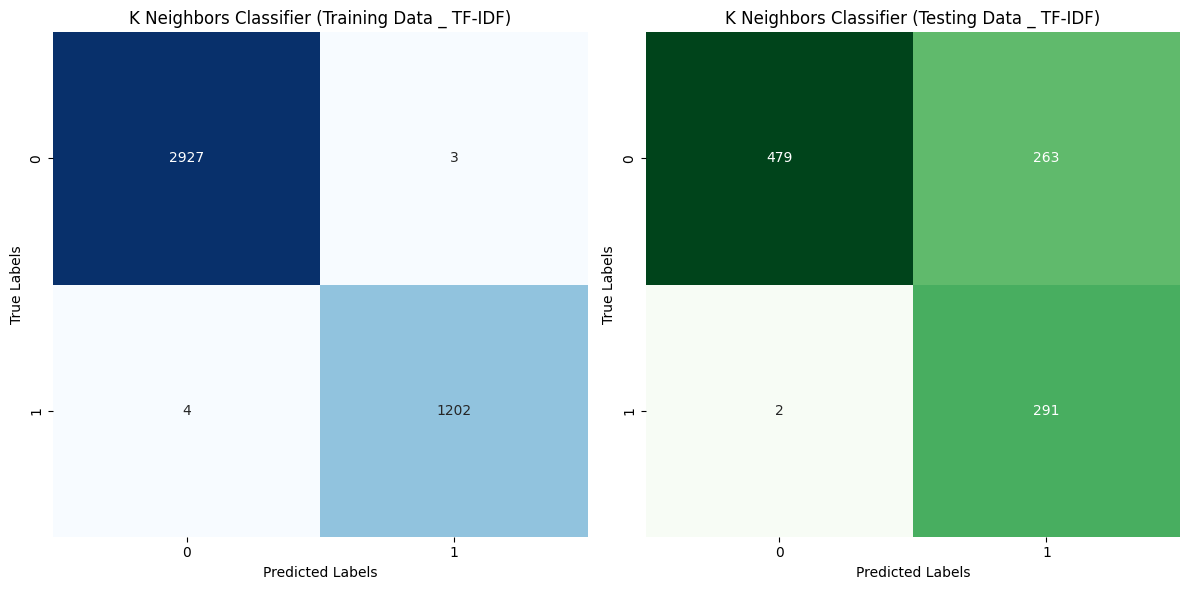


Classification Report (Training Data):
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00      2930
        spam       1.00      1.00      1.00      1206

    accuracy                           1.00      4136
   macro avg       1.00      1.00      1.00      4136
weighted avg       1.00      1.00      1.00      4136


Classification Report (Testing Data):
               precision    recall  f1-score   support

         ham       1.00      0.65      0.78       742
        spam       0.53      0.99      0.69       293

    accuracy                           0.74      1035
   macro avg       0.76      0.82      0.74      1035
weighted avg       0.86      0.74      0.76      1035



In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi dan pelatihan model KNeighborsClassifier
KNN2 = KNeighborsClassifier(algorithm='brute', n_jobs=-1)
KNN2.fit(x2_train, y2_train)

# Prediksi untuk data training
y2_train_pred = KNN2.predict(x2_train)
train_accuracy = accuracy_score(y2_train, y2_train_pred)
print("Training Accuracy:", train_accuracy)

# Prediksi untuk data testing
y2_test_pred = KNN2.predict(x2_test)
test_accuracy = accuracy_score(y2_test, y2_test_pred)
print("Testing Accuracy:", test_accuracy)

# Confusion matrix untuk data training
train_conf_matrix = confusion_matrix(y2_train, y2_train_pred)
print("\nK Neighbors Classifier (Training Data _ TF-IDF):\n", train_conf_matrix)

# Confusion matrix untuk data testing
test_conf_matrix = confusion_matrix(y2_test, y2_test_pred)
print("\nK Neighbors Classifier (Testing Data _ TF-IDF):\n", test_conf_matrix)

# Visualisasi confusion matrix sebagai gambar
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('K Neighbors Classifier (Training Data _ TF-IDF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('K Neighbors Classifier (Testing Data _ TF-IDF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


print("\nClassification Report (Training Data):\n", classification_report(y2_train, y2_train_pred))
print("\nClassification Report (Testing Data):\n", classification_report(y2_test, y2_test_pred))

